In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('classic')

In [2]:
df= pd.read_excel(r"C:\Users\MINE\Desktop\data analysis\excel_for_data_analysis.xlsx", sheet_name= 'bike buyers')


In [3]:
df.sample(10)

,ID,Marital status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age bracket,Purchased Bike
898,18066,Single,Male,70000,5,Bachelors,Management,Yes,3,10 miles +,North America,60,OLd,Yes
91,28436,Single,Male,30000,0,Partial College,Clerical,No,1,0-1 Miles,Europe,30,Adolescense,Yes
399,26167,Single,Female,40000,2,Bachelors,Management,No,1,5-10 Miles,Pacific,53,Middle age,Yes
419,19255,Single,Male,10000,2,Partial College,Manual,Yes,1,0-1 Miles,Europe,51,Middle age,Yes
575,13388,Single,Male,60000,2,Partial College,Professional,Yes,1,10 miles +,North America,56,OLd,No
481,28564,Single,Female,40000,2,Partial College,Clerical,Yes,0,1-2 Miles,Europe,33,Middle age,Yes
162,29181,Single,Female,60000,2,Bachelors,Professional,No,1,0-1 Miles,Pacific,38,Middle age,Yes
549,13453,Married,Female,130000,3,Bachelors,Management,Yes,3,0-1 Miles,North America,45,Middle age,Yes
50,13826,Single,Female,30000,0,Partial College,Clerical,No,1,0-1 Miles,Europe,28,Adolescense,No
411,11116,Married,Male,70000,5,Partial College,Skilled Manual,Yes,2,5-10 Miles,Pacific,43,Middle age,No


In [4]:
df.describe(include= 'all')

,ID,Marital status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age bracket,Purchased Bike
count,1000.000000,1000,1000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000
unique,NaN,2,2,NaN,NaN,5,5,2,NaN,5,3,NaN,3,2
top,NaN,Married,Male,NaN,NaN,Bachelors,Professional,Yes,NaN,0-1 Miles,North America,NaN,Middle age,No
freq,NaN,538,511,NaN,NaN,306,276,683,NaN,366,508,NaN,694,519
mean,19965.992000,NaN,NaN,56360.000000,1.898000,NaN,NaN,NaN,1.442000,NaN,NaN,44.163000,NaN,NaN
std,5347.333948,NaN,NaN,31085.635215,1.628572,NaN,NaN,NaN,1.125123,NaN,NaN,11.364488,NaN,NaN
min,11000.000000,NaN,NaN,10000.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,25.000000,NaN,NaN
25%,15290.750000,NaN,NaN,30000.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,35.000000,NaN,NaN
50%,19744.000000,NaN,NaN,60000.000000,2.000000,NaN,NaN,NaN,1.000000,NaN,NaN,43.000000,NaN,NaN
75%,24470.750000,NaN,NaN,70000.000000,3.000000,NaN,NaN,NaN,2.000000,NaN,NaN,52.000000,NaN,NaN


In [166]:
df.dtypes

ID                   int64
Marital status      object
Gender              object
Income               int64
Children             int64
Education           object
Occupation          object
Home Owner          object
Cars                 int64
Commute Distance    object
Region              object
Age                  int64
Age bracket         object
Purchased Bike      object
dtype: object

In [167]:
df.columns

Index(['ID', 'Marital status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Age bracket', 'Purchased Bike'],
      dtype='object')

In [168]:
# Data cleaning

df.drop_duplicates(inplace= True)

#  Average income by gender,that purchased bike or not

In [169]:
Average_income_by_gender= df.groupby(['Gender','Purchased Bike'])['Income'].sum().reset_index()

Average_income_by_gender


,Gender,Purchased Bike,Income
0,Female,No,13360000
1,Female,Yes,13330000
2,Male,No,15120000
3,Male,Yes,14550000


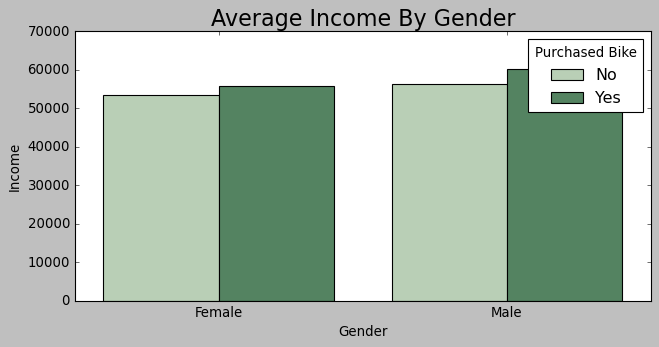

In [170]:
plt.figure(figsize=(8.4,4.5))
sns.barplot(data= df, x='Gender', hue='Purchased Bike', y='Income',
            errorbar= None,
           palette='Greens',
           saturation=0.45)

plt.title('Average Income By Gender', fontsize= 20)

plt.tight_layout()
plt.show()

#  Number of purchase by age bracket

In [171]:
number= df[df['Purchased Bike']== 'Yes']

number= number.groupby('Age bracket')['Purchased Bike'].count().reset_index()

number

,Age bracket,Purchased Bike
0,Adolescense,47
1,Middle age,380
2,OLd,54


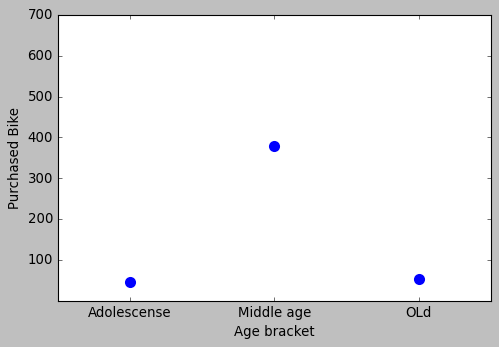

In [172]:
plt.figure(figsize=(6.4,4.5))

sns.stripplot(data= number, x= 'Age bracket', y='Purchased Bike', size= 10)

plt.yticks([100,200,300,400,500,600,700])


plt.tight_layout()
plt.show()

# community Distance To Number Of purchase

In [118]:
community= df[df['Purchased Bike']== 'Yes']
community=community.groupby('Commute Distance')['Purchased Bike'].count().reset_index()
community



,Commute Distance,Purchased Bike
0,0-1 Miles,200
1,1-2 Miles,77
2,10 miles +,33
3,2-5 Miles,95
4,5-10 Miles,76


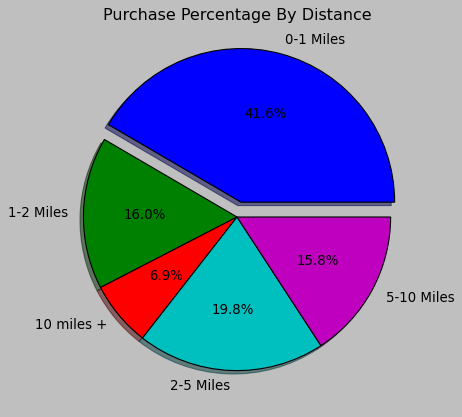

In [119]:

labels= ['0-1 Miles','1-2 Miles','10 miles +','2-5 Miles','5-10 Miles']
plt.pie(community['Purchased Bike'],labels= labels,
        wedgeprops= {'edgecolor': 'black'},
        explode=[0.1,0,0,0,0],
        shadow= True ,
        autopct= '%1.1f%%'
                
)

plt.title('Purchase Percentage By Distance')
plt.show()

# Number of bikes purchased by region

In [173]:

region= df[df['Purchased Bike']== 'Yes']
region=region.groupby('Region')['Purchased Bike'].count().reset_index()
region

,Region,Purchased Bike
0,Europe,148
1,North America,220
2,Pacific,113


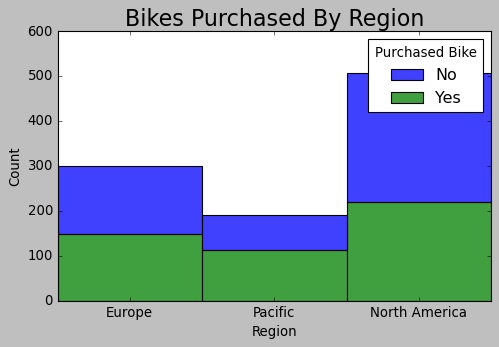

In [174]:
plt.figure(figsize=(6.4,4.5))

sns.histplot(data= df,x='Region', hue= 'Purchased Bike',multiple= 'stack',  cbar=True)
# plt.plot(df2.Region, df2['Purchased Bike'])
plt.title('Bikes Purchased By Region', fontsize= 20)
plt.tight_layout()
plt.show()

# Number Of bikes Purchased By Education

In [175]:
edu= df[df['Purchased Bike']== 'Yes']
edu= edu.groupby('Education')['Purchased Bike'].count().reset_index()
edu

,Education,Purchased Bike
0,Bachelors,169
1,Graduate Degree,94
2,High School,79
3,Partial College,119
4,Partial High School,20


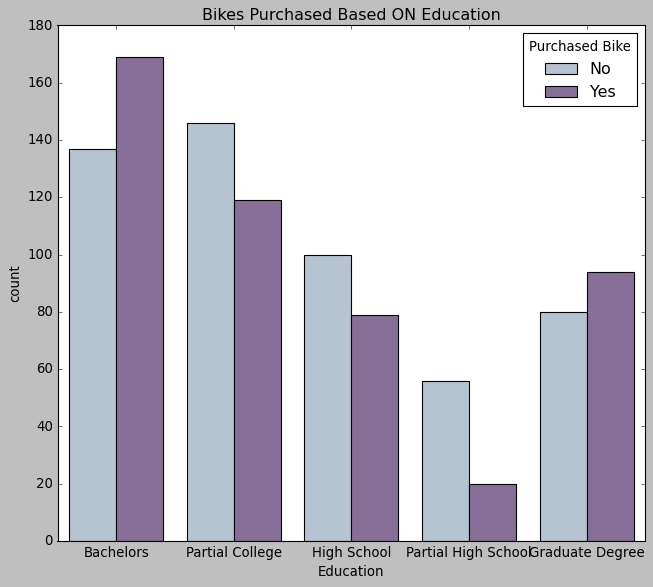

In [186]:
plt.figure(figsize=(8.4,7.5))

sns.countplot(data= df, x='Education', hue='Purchased Bike',
              palette='BuPu',
    
    saturation=0.5,)
plt.title('Bikes Purchased Based ON Education')
plt.tight_layout()
plt.show()

In [149]:
df1= df

for col in df1.columns:
    if df1[col].dtype ==  'object':
        df1[col]= df1[col].astype('category')
        df1[col]= df1[col].cat.codes
df1

,ID,Marital status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age bracket,Purchased Bike
0,12496,0,0,40000,1,0,4,1,0,0,0,42,1,0
1,24107,0,1,30000,3,3,0,1,1,0,0,43,1,0
2,14177,0,1,80000,5,3,3,0,2,3,0,60,2,0
3,24381,1,1,70000,0,0,3,1,1,4,2,41,1,1
4,25597,1,1,30000,0,0,0,0,0,0,0,36,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,0,1,60000,2,2,3,1,2,3,1,54,1,1
996,28672,1,1,70000,4,1,3,1,0,3,1,35,1,1
997,11809,0,1,60000,2,0,4,1,0,0,1,38,1,1
998,19664,1,1,100000,3,0,1,0,3,1,1,38,1,0


In [150]:
corr= df1.corr()
corr

,ID,Marital status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age bracket,Purchased Bike
ID,1.000000,0.126271,-0.001813,-0.073531,-0.030987,0.052973,-0.012572,-0.139421,0.032816,0.038946,0.037666,-0.049908,-0.036639,0.056357
Marital status,0.126271,1.000000,-0.096631,-0.081879,-0.140323,0.055557,-0.065810,-0.317035,0.015689,0.030850,-0.020560,-0.209131,-0.183981,0.111515
Gender,-0.001813,-0.096631,1.000000,0.056019,-0.008453,-0.005087,0.033950,0.008543,0.062507,0.069719,0.072704,0.001357,-0.023180,-0.015179
Income,-0.073531,-0.081879,0.056019,1.000000,0.258603,-0.226524,0.142978,0.019791,0.428701,0.153347,0.279884,0.170077,0.191890,0.049655
Children,-0.030987,-0.140323,-0.008453,0.258603,1.000000,-0.048871,0.015826,0.156674,0.263360,0.066031,0.061149,0.529743,0.478198,-0.119192
Education,0.052973,0.055557,-0.005087,-0.226524,-0.048871,1.000000,0.029801,-0.111139,0.159105,0.114571,-0.138469,-0.090495,-0.213838,-0.141277
Occupation,-0.012572,-0.065810,0.033950,0.142978,0.015826,0.029801,1.000000,0.004591,0.059702,0.202396,0.222479,-0.160323,-0.176256,0.008847
Home Owner,-0.139421,-0.317035,0.008543,0.019791,0.156674,-0.111139,0.004591,1.000000,-0.072403,0.167219,0.002369,0.111378,0.149550,-0.015154
Cars,0.032816,0.015689,0.062507,0.428701,0.263360,0.159105,0.059702,-0.072403,1.000000,0.259699,0.253706,0.188040,0.111296,-0.196845
Commute Distance,0.038946,0.030850,0.069719,0.153347,0.066031,0.114571,0.202396,0.167219,0.259699,1.000000,0.304697,0.149327,0.053126,-0.075957


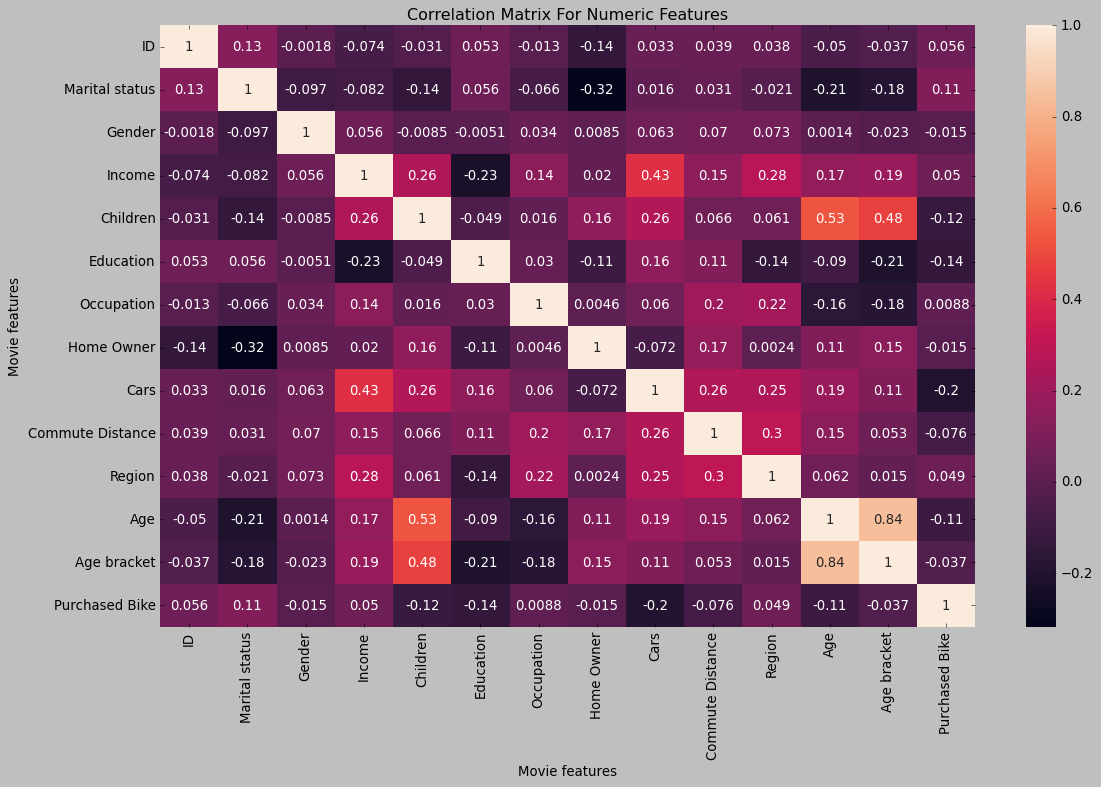

In [151]:

plt.figure(figsize= (15,10))
sns.heatmap(corr, annot= True)

plt.title('Correlation Matrix For Numeric Features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

plt.tight_layout()
plt.show()

In [152]:
corr1= corr.unstack()

corr1

ID              ID                  1.000000
                Marital status      0.126271
                Gender             -0.001813
                Income             -0.073531
                Children           -0.030987
                                      ...   
Purchased Bike  Commute Distance   -0.075957
                Region              0.048943
                Age                -0.106497
                Age bracket        -0.037404
                Purchased Bike      1.000000
Length: 196, dtype: float64

In [153]:
sort= corr1.sort_values()
sort

Marital status  Home Owner       -0.317035
Home Owner      Marital status   -0.317035
Education       Income           -0.226524
Income          Education        -0.226524
Education       Age bracket      -0.213838
                                    ...   
Income          Income            1.000000
Gender          Gender            1.000000
Marital status  Marital status    1.000000
Age bracket     Age bracket       1.000000
Purchased Bike  Purchased Bike    1.000000
Length: 196, dtype: float64

In [154]:
high= sort[(sort )> 0.5]
high

Children          Age                 0.529743
Age               Children            0.529743
                  Age bracket         0.844830
Age bracket       Age                 0.844830
ID                ID                  1.000000
Age               Age                 1.000000
Region            Region              1.000000
Commute Distance  Commute Distance    1.000000
Cars              Cars                1.000000
Home Owner        Home Owner          1.000000
Occupation        Occupation          1.000000
Education         Education           1.000000
Children          Children            1.000000
Income            Income              1.000000
Gender            Gender              1.000000
Marital status    Marital status      1.000000
Age bracket       Age bracket         1.000000
Purchased Bike    Purchased Bike      1.000000
dtype: float64